# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow

# Importing Deep Learning Libraries
import keras
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

# Displaying Images

In [2]:
picture_size = 48
folder_path = "D:\\Downloads\\figma\\images\\"

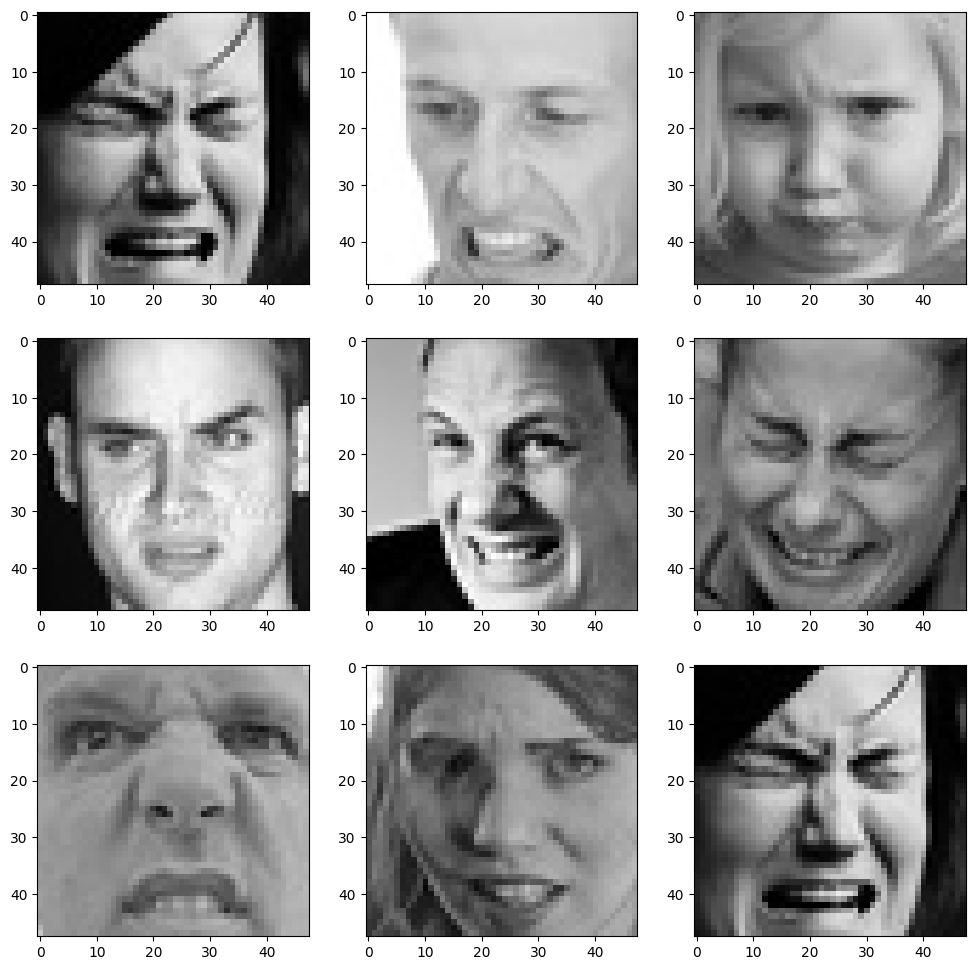

In [3]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

# Making Training and Validation Data

In [4]:
batch_size  = 128

datagen_train  = ImageDataGenerator(rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,)
datagen_val = ImageDataGenerator(rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,)

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building

In [5]:
from keras.optimizers import Adam,SGD,RMSprop
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout



# no_of_classes = 7

# model = Sequential()

# #1st CNN layer
# model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

# #2nd CNN layer
# model.add(Conv2D(128,(5,5),padding = 'same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

# #3rd CNN layer
# model.add(Conv2D(512,(3,3),padding = 'same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout (0.25))

# #4th CNN layer
# model.add(Conv2D(512,(3,3), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())

# #Fully connected 1st layer
# model.add(Dense(256))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))


# # Fully connected layer 2nd layer
# model.add(Dense(512))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

# model.add(Dense(no_of_classes, activation='softmax'))


def create_model():
    weight_decay = 1e-4
    model = keras.models.Sequential()

    model.add(keras.layers.Conv2D(64, (4, 4), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay), input_shape=(48, 48, 1)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(64, (4, 4), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.2))

    model.add(keras.layers.Conv2D(128, (4, 4), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.3))
    
    model.add(keras.layers.Conv2D(128, (4, 4), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Conv2D(128, (4, 4), padding='same', kernel_regularizer=keras.regularizers.l2(weight_decay)))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(0.4))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation="linear"))
    model.add(keras.layers.Activation('relu'))
    model.add(keras.layers.Dense(7, activation='softmax'))
    
    return model

model = create_model()
opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# model = Sequential()
# model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(48,48,1)))
# model.add(Dropout(0.5))
# model.add(Bidirectional(LSTM(64)))
# model.add(Dropout(0.5))
# model.add(Dense(no_of_classes, activation='softmax'))

# optimizer = Adam(lr=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1088      
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        65600     
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                       

# Fitting the Model with Training and Validation Data 

In [7]:
from keras.optimizers import RMSprop,SGD,Adam,Nadam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = tensorflow.keras.callbacks.ModelCheckpoint(filepath  = "new_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 2

model.compile(loss='categorical_crossentropy',
              optimizer = Nadam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

# Plotting Accuracy & Loss

[0.3779829442501068, 0.3948863744735718, 0.49985796213150024, 0.5321022868156433, 0.5264204740524292, 0.5617897510528564, 0.574999988079071, 0.5697442889213562, 0.5927556753158569, 0.6069602370262146, 0.6123579740524292, 0.6098011136054993, 0.6197443008422852]


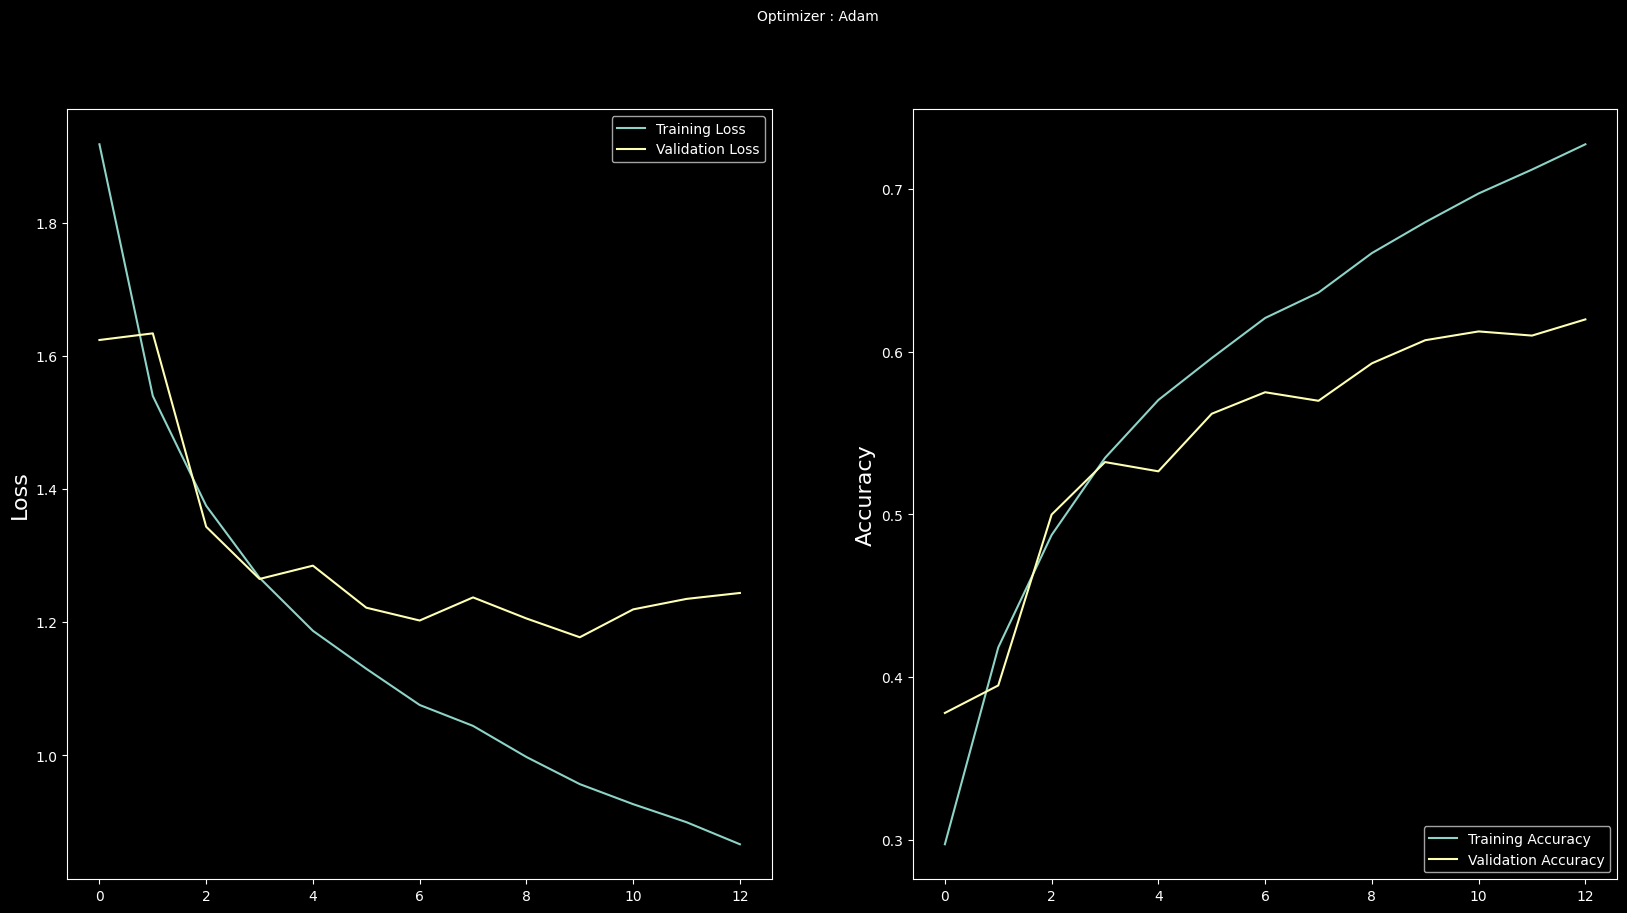

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
print(history.history['val_accuracy'])
plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()